In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,chest_pain_type,Resting_Blood_Pressure,Serum_Cholestrol,Diabetes,restecg,thalach,exang,oldpeak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,chest_pain_type,Resting_Blood_Pressure,Serum_Cholestrol,Diabetes,restecg,thalach,exang,oldpeak,slope,ca,thalassemia,target
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.070845,0.465433,1.030773,17.516406,51.766511,0.355756,0.525208,22.876772,0.469212,1.159636,0.615462,1.021339,0.611518,0.498217
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data['ID'] = data.index  # Add an ID column
# Rearrange columns to place ID as the first column
cols = ['ID'] + [col for col in data.columns if col != 'ID']
data = data[cols]


In [5]:
data.head()

,ID,age,sex,chest_pain_type,Resting_Blood_Pressure,Serum_Cholestrol,Diabetes,restecg,thalach,exang,oldpeak,slope,ca,thalassemia,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.isnull().any()

,0
ID,False
age,False
sex,False
chest_pain_type,False
Resting_Blood_Pressure,False
Serum_Cholestrol,False
Diabetes,False
restecg,False
thalach,False
exang,False


In [7]:
X = data.iloc[:, 1:-1].values
y = data["target"].values

In [8]:
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, data['ID'], test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Create a Sequential model
classifier = Sequential()

# First hidden layer with Leaky ReLU
classifier.add(Dense(units = 8, input_dim = 13, kernel_initializer = "uniform"))
classifier.add(LeakyReLU(alpha=0.01))  # alpha controls the slope of the negative part

# Second hidden layer with Leaky ReLU
classifier.add(Dense(units = 14, kernel_initializer = "uniform"))
classifier.add(LeakyReLU(alpha=0.01))  # alpha controls the slope of the negative part

# Output layer with Sigmoid activation
classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation='sigmoid'))

# Compile the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [11]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100 )

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5899 - loss: 0.6856
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 0.4792
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3961
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8718 - loss: 0.3352
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3478
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3297
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.3251
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8724 - loss: 0.3127
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3174
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3149
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - loss: 0.2840
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━

In [12]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [13]:
predictions_df = pd.DataFrame({
    'ID': ids_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
})

In [14]:
print("Predictions:\n", predictions_df)

Predictions:
         ID  Actual  Predicted
198    198       0      False
1009  1009       1       True
55      55       1       True
743    743       1       True
907    907       0      False
...    ...     ...        ...
642    642       1       True
1042  1042       1       True
580    580       0      False
995    995       1       True
187    187       0      False

[243 rows x 3 columns]


In [15]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,   2],
       [  6, 135]])

In [16]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

96.70781893004116


## **Comparative Analysis**


In [17]:
from keras.layers import LeakyReLU
from sklearn.metrics import f1_score, confusion_matrix

def build_model(activation):
    model = Sequential()
    model.add(Dense(units=8, input_dim=13, kernel_initializer='uniform'))

    # Applying Leaky ReLU separately as it needs special handling
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(Dense(units=8, activation=activation))

    model.add(Dense(units=14, activation=activation, kernel_initializer='uniform'))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))  # Sigmoid for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [18]:
# Define the activation functions to test
activations = ['relu', 'tanh', 'sigmoid', 'leaky_relu']
results = {}

for activation in activations:
    print(f"\nTesting with Activation Function: {activation}")
    model = build_model(activation)

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Binarize predictions

    # Calculate all metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[activation] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")



Testing with Activation Function: relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy: 0.9300
Precision: 0.9844
Recall: 0.8936
F1 Score: 0.9368

Testing with Activation Function: tanh


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.9588
Precision: 0.9712
Recall: 0.9574
F1 Score: 0.9643

Testing with Activation Function: sigmoid


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Accuracy: 0.9136
Precision: 0.9167
Recall: 0.9362
F1 Score: 0.9263

Testing with Activation Function: leaky_relu
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.9712
Precision: 0.9527
Recall: 1.0000
F1 Score: 0.9758


In [19]:
# Print the results for each activation function
print("\nComparative Analysis of Activation Functions:")
for activation, metrics in results.items():
    print(f"Activation: {activation.capitalize()} | Accuracy: {metrics['accuracy']:.4f} | Precision: {metrics['precision']:.4f} | Recall: {metrics['recall']:.4f} | F1 Score: {metrics['f1_score']:.4f}")



Comparative Analysis of Activation Functions:
Activation: Relu | Accuracy: 0.9300 | Precision: 0.9844 | Recall: 0.8936 | F1 Score: 0.9368
Activation: Tanh | Accuracy: 0.9588 | Precision: 0.9712 | Recall: 0.9574 | F1 Score: 0.9643
Activation: Sigmoid | Accuracy: 0.9136 | Precision: 0.9167 | Recall: 0.9362 | F1 Score: 0.9263
Activation: Leaky_relu | Accuracy: 0.9712 | Precision: 0.9527 | Recall: 1.0000 | F1 Score: 0.9758


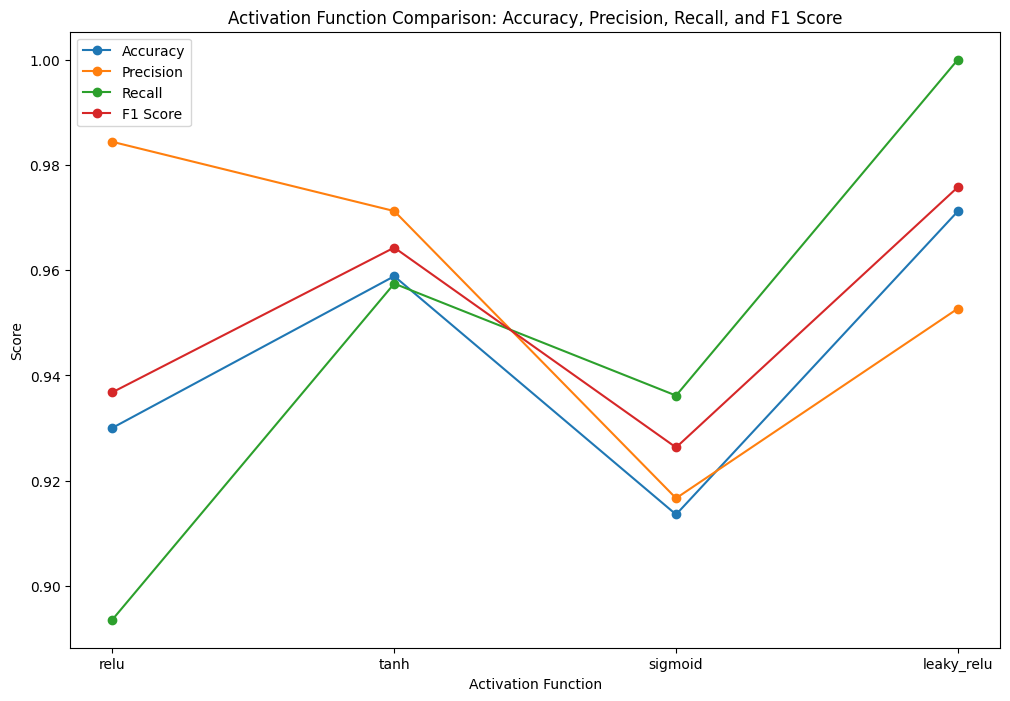

In [20]:
import matplotlib.pyplot as plt

activations_list = list(results.keys())
accuracy_values = [metrics['accuracy'] for metrics in results.values()]
precision_values = [metrics['precision'] for metrics in results.values()]
recall_values = [metrics['recall'] for metrics in results.values()]
f1_values = [metrics['f1_score'] for metrics in results.values()]

# Plot each metric
plt.figure(figsize=(12, 8))
plt.plot(activations_list, accuracy_values, label="Accuracy", marker='o')
plt.plot(activations_list, precision_values, label="Precision", marker='o')
plt.plot(activations_list, recall_values, label="Recall", marker='o')
plt.plot(activations_list, f1_values, label="F1 Score", marker='o')
plt.xlabel("Activation Function")
plt.ylabel("Score")
plt.title("Activation Function Comparison: Accuracy, Precision, Recall, and F1 Score")
plt.legend()
plt.show()


In [21]:
# Predict on the test set
y_test_pred = classifier.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

# Generate the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:\n", cm_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix for Test Set:
 [[100   2]
 [  6 135]]


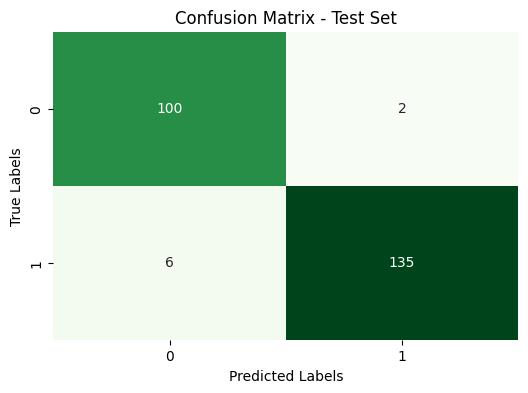

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the training set
cm_train = confusion_matrix(y_test, y_test_pred)


# Plot the confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Test Set")
plt.show()
